In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
import string 
import re
import plotly.express as px
import nltk

In [3]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [4]:
fake['Target']=1
true['Target']=0

In [5]:
df=pd.concat((fake,true))
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,date,Target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...


In [6]:
df.subject=df.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})

### Lower casing


In [7]:
df['cleaned_title']=df['title'].apply(lambda x:x.lower())

### Removing stopwords


In [8]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


In [9]:
df['cleaned_title'] = df['cleaned_title'].apply(lambda x:remove_stopwords(x))
df['cleaned_title'].head()

0    donald trump sends embarrassing new year’s eve...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke internet joke threatening...
3        trump obsessed obama’s coded website (images)
4    pope francis called donald trump christmas speech
Name: cleaned_title, dtype: object

### Removing Punctutations

In [10]:
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [11]:
df['cleaned_title']= df['cleaned_title'].apply(lambda x: remove_punctuation(x))
df['cleaned_title'] = df['cleaned_title'].str.replace(r"[\"\,’]", '')
df['cleaned_title'].head()

<ipython-input-11-2457fdee5104>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_title'] = df['cleaned_title'].str.replace(r"[\"\,’]", '')


0    donald trump sends embarrassing new years eve ...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke internet joke threatening...
3           trump obsessed obamas coded website images
4    pope francis called donald trump christmas speech
Name: cleaned_title, dtype: object

### Keywords Extraction

In [12]:
from collections import Counter

def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return most_common_tokens

In [13]:
emotion_list = df['Target'].unique().tolist()
emotion_list

[1, 0]

In [14]:
list1 = df[df['Target'] == 1]['cleaned_title'].tolist()
list0 = df[df['Target'] == 0]['cleaned_title'].tolist()

In [15]:
docx1 = ' '.join(list1)
docx0= ' '.join(list0)

In [16]:
keywords1 = extract_keywords(docx1)
keywords0 = extract_keywords(docx0)

In [17]:
from wordcloud import WordCloud
def plot_wordcloud(docs):
    mycloud= WordCloud(max_words = 200 , width = 1600 , height = 800 , stopwords = stopwords).generate(docs)
    plt.figure(figsize=(10,10))
    plt.imshow(mycloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

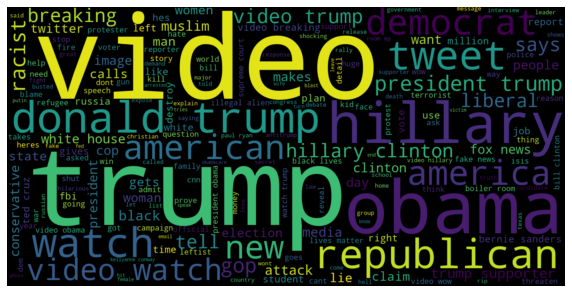

In [18]:
plot_wordcloud(docx1)

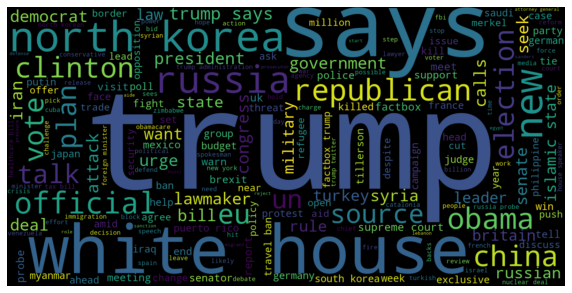

In [19]:
plot_wordcloud(docx0)

###  Finding Max length

In [20]:
maxlen = -1
for doc in df['cleaned_title']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
# fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.ct], nbins = 50)
# fig.show()

The maximum number of words in a title is = 34


In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_title'], df.Target, test_size = 0.2,random_state=10,stratify=df.Target)

vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix

In [24]:
model1 = LogisticRegression(C=2)
model1.fit(X_vec_train, y_train)
predicted_value1 = model1.predict(X_vec_test)
accuracy_value1 = roc_auc_score(y_test, predicted_value1)
print(accuracy_value1)

0.9464290685041762


C:\Users\Ritik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


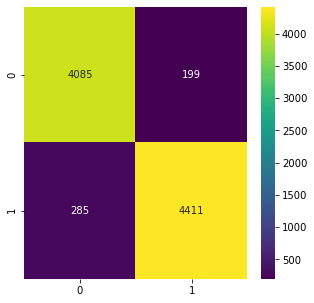

In [25]:
cm = confusion_matrix(list(y_test), predicted_value1)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

### Making predictions on Title

In [26]:
df['cleaned_text']=df['text'].apply(lambda x:x.lower())

In [27]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x:remove_stopwords(x))

In [28]:
df['cleaned_text']= df['cleaned_text'].apply(lambda x: remove_punctuation(x))
df['cleaned_text'] = df['cleaned_text'].str.replace(r"[\"\,’]", '')

<ipython-input-28-11529096a598>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_text'] = df['cleaned_text'].str.replace(r"[\"\,’]", '')


In [29]:
maxlen = -1
for doc in df['cleaned_text']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
# fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.ct], nbins = 50)
# fig.show()

The maximum number of words in a title is = 4762


In [30]:
from collections import Counter

def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return most_common_tokens

In [31]:
list1 = df[df['Target'] == 1]['cleaned_text'].tolist()
list0 = df[df['Target'] == 0]['cleaned_text'].tolist()

In [32]:
doc1 = ' '.join(list1)
doc0= ' '.join(list0)

In [33]:
keywords1 = extract_keywords(doc1)
keywords0 = extract_keywords(doc0)

In [34]:
from wordcloud import WordCloud
def plot_wordcloud(docs):
    mycloud= WordCloud(max_words = 200 , width = 1600 , height = 800 , stopwords = stopwords).generate(docs)
    plt.figure(figsize=(10,10))
    plt.imshow(mycloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

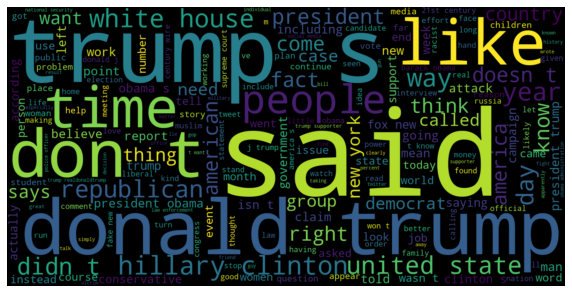

In [35]:
plot_wordcloud(doc1)

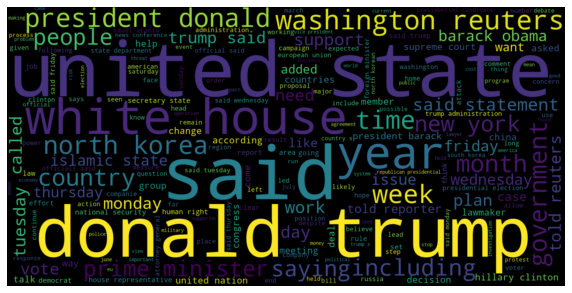

In [36]:
plot_wordcloud(doc0)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.cleaned_text, df.Target, test_size = 0.2,random_state=10,stratify=df.Target)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)


In [38]:
model2 = LogisticRegression(C=2.5)
model2.fit(X_vec_train, y_train)
predicted_value2 = model2.predict(X_vec_test)
accuracy_value2 = roc_auc_score(y_test, predicted_value2)
print(accuracy_value2)

0.9966829150740364


C:\Users\Ritik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


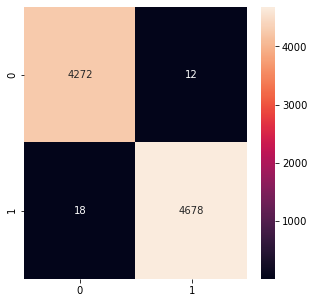

In [39]:
prediction = []
for i in range(len(predicted_value2)):
    if predicted_value2[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True,fmt='g')

###  Predcitions on original feature

In [40]:
df['cleaned_original']=df['original'].apply(lambda x:x.lower())

In [41]:
df['cleaned_original'] = df['cleaned_original'].apply(lambda x:remove_stopwords(x))

In [42]:
df['cleaned_original']= df['cleaned_original'].apply(lambda x: remove_punctuation(x))
df['cleaned_original'] = df['cleaned_original'].str.replace(r"[\"\,’]", '')

<ipython-input-42-788ee0ef3f3f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_original'] = df['cleaned_original'].str.replace(r"[\"\,’]", '')


In [43]:
maxlen = -1
for doc in df['cleaned_original']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
# fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.ct], nbins = 50)
# fig.show()

The maximum number of words in a title is = 4776


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_original'], df.Target, test_size = 0.2,random_state=10,stratify=df.Target)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)


In [45]:

model3 = LogisticRegression(C=3)
model3.fit(X_vec_train, y_train)
predicted_value3 = model3.predict(X_vec_test)
accuracy_value3 = roc_auc_score(y_test, predicted_value3)
print(accuracy_value3)

0.9973217566413277


C:\Users\Ritik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


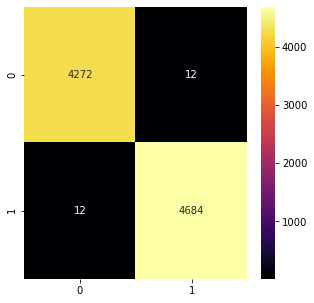

In [46]:
prediction = []
for i in range(len(predicted_value3)):
    if predicted_value3[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True,fmt='g',cmap='inferno')

In [47]:
import pickle
with open('Model1_title.pkl', 'wb') as file:
    pickle.dump(model1, file)


In [48]:
import pickle
with open('Model2_text.pkl', 'wb') as file:
    pickle.dump(model2, file)


In [49]:
import pickle
with open('Model3_original.pkl', 'wb') as file:
    pickle.dump(model3, file)
